### Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import os
from nltk.corpus import stopwords
import re
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump,load 
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm,tree
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score

In [2]:
data=pd.read_csv("cyberbullying_tweets.csv")
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


### Data Cleaning

In [3]:
def case_convert():
    data.tweet_text=[i.lower() for i in data.tweet_text.values]

def remove_specials():
    data.tweet_text=[re.sub(r"[^a-zA-Z]"," ",text) for text in data.tweet_text.values]
    
def remove_shorthands():
    CONTRACTION_MAP={
        "ain't":"is not",
        "aren't":"are not",
        "can't":"cannot",
        "can't've":"cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
    }
    
    texts=[]
    for text in data.tweet_text.values:
        string=""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string=string+" "+CONTRACTION_MAP[word]
            else:
                string=string+" "+word
        texts.append(string.strip())
    data.tweet_text=texts

def remove_stopwords():
    texts=[]
    stopwords_list=stopwords.words('english')
    for item in data.tweet_text.values:
        string=""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string=string+" "+word
        texts.append(string)
    data.tweet_text=texts

def remove_links():
    texts=[]
    for text in data.tweet_text.values:
        remove_https=re.sub(r'http\S+','',text)
        remove_com=re.sub(r'\ [A-Za-z]*\.com'," ",remove_https)
        texts.append(remove_com)
    data.tweet_text=texts

def remove_accents():
    data.tweet_text=[unidecode.unidecode(text) for text in data.tweet_text.values]

def normalize_spaces():
    data.tweet_text=[re.sub(r"\s+"," ",text) for text in data.tweet_text.values]
    
case_convert()
remove_links()
remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
print(data)

                                              tweet_text cyberbullying_type
0                words katandandre food crapilicious mkr  not_cyberbullying
1       aussietv white mkr theblock imacelebrityau to...  not_cyberbullying
2       xochitlsuckkks classy whore red velvet cupcakes   not_cyberbullying
3       jason gio meh p thanks heads concerned anothe...  not_cyberbullying
4       rudhoeenglish isis account pretending kurdish...  not_cyberbullying
...                                                  ...                ...
47687   black ppl expected anything depended anything...          ethnicity
47688   turner withhold disappointment turner called ...          ethnicity
47689   swear god dumb nigger bitch got bleach hair r...          ethnicity
47690   yea fuck rt therealexel youre nigger fucking ...          ethnicity
47691   bro u gotta chill rt chillshrammy dog fuck kp...          ethnicity

[47692 rows x 2 columns]


In [4]:
lenc=LabelEncoder()
data.cyberbullying_type=lenc.fit_transform(data.cyberbullying_type)
lenc.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

### EDA

In [5]:
lenc.inverse_transform(data['cyberbullying_type'])

array(['not_cyberbullying', 'not_cyberbullying', 'not_cyberbullying', ...,
       'ethnicity', 'ethnicity', 'ethnicity'], dtype=object)

In [6]:
lenc.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

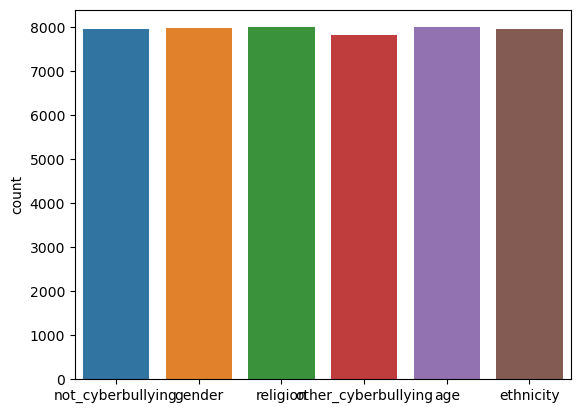

<Figure size 1200x1200 with 0 Axes>

In [7]:
sns.countplot(lenc.inverse_transform(data['cyberbullying_type']))
xlabel="Cyber Bullying Type"
plt.figure(figsize=(12,12))
plt.show()

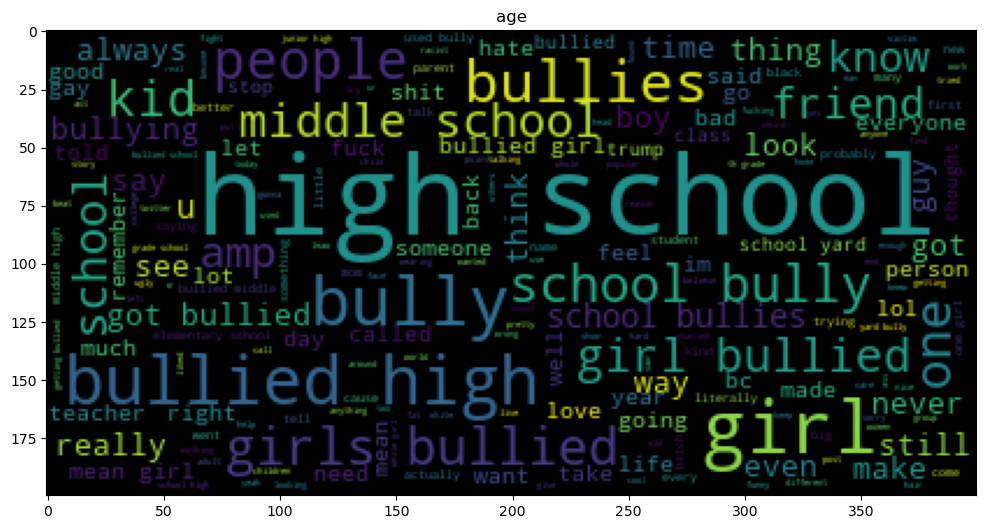

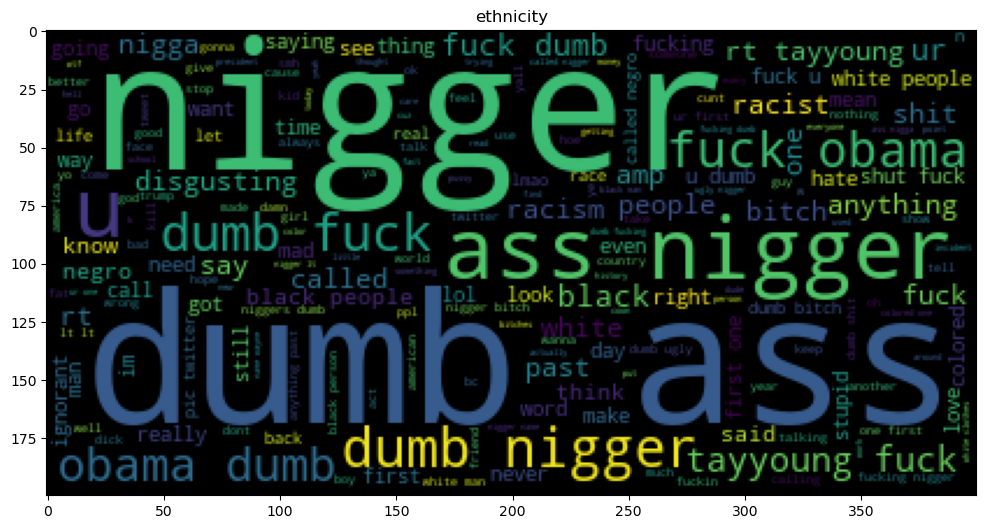

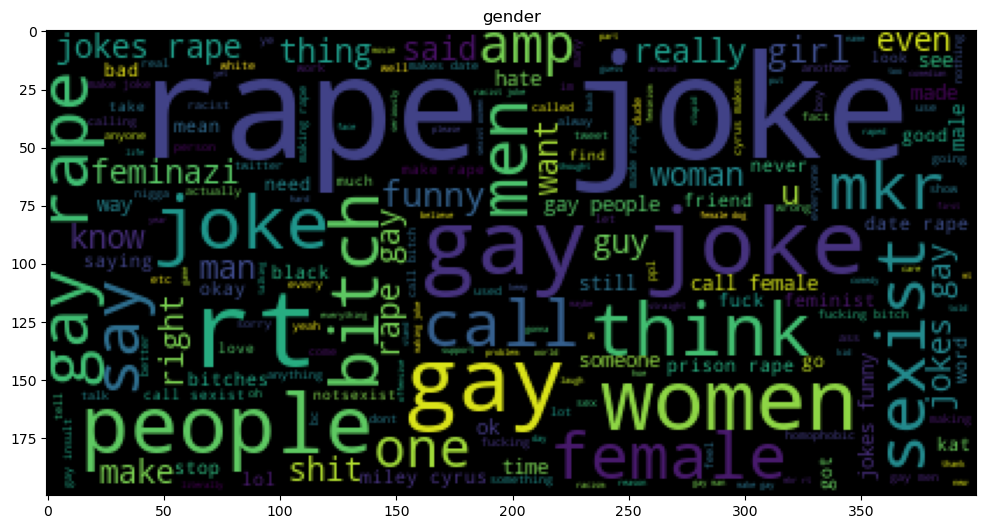

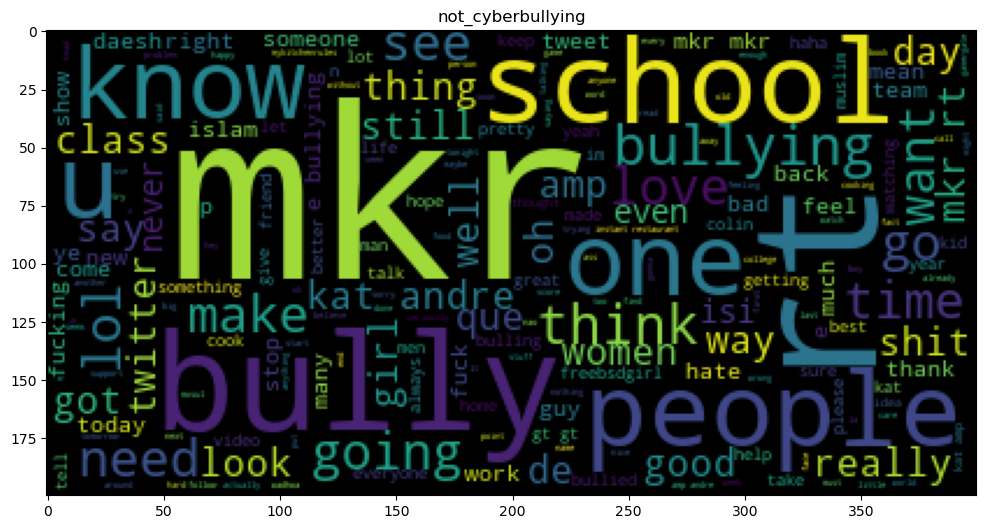

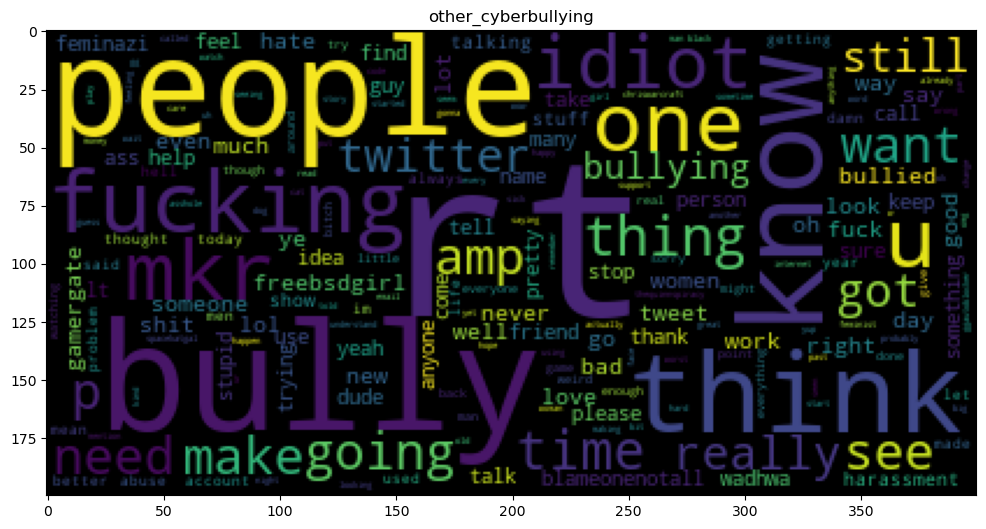

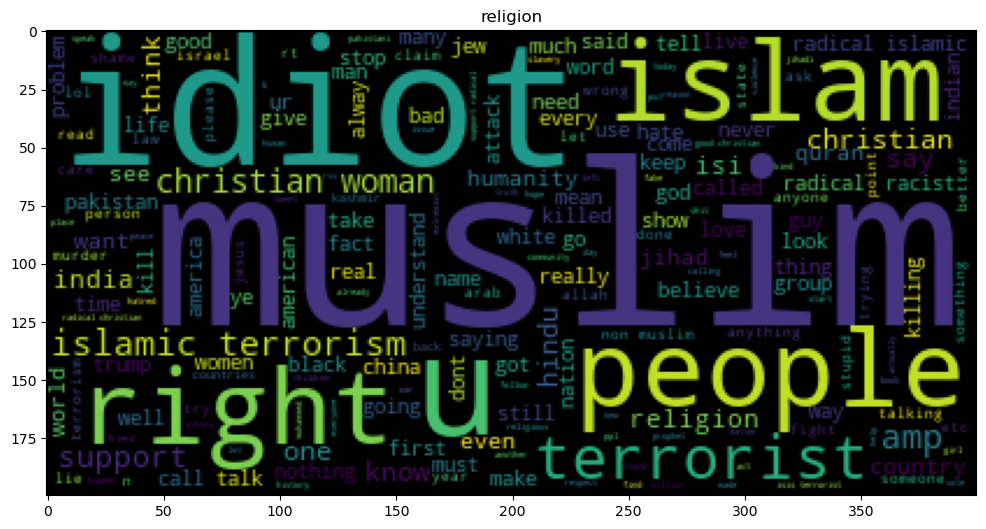

In [8]:
for c in range(len(lenc.classes_)):
    string_a=""
    for i in data[data.cyberbullying_type==c].tweet_text.values:
        string_a=string_a+" "+i.strip()
    wordcloud=WordCloud(background_color='black').generate(string_a)
    plt.figure(figsize=(12,12))
    plt.title(lenc.classes_[c])
    plt.imshow(wordcloud)
    plt.show()
    del string_a

### Train Test Split

In [9]:
vec=TfidfVectorizer(max_features=10000)
X=vec.fit_transform(data.tweet_text.values).toarray()
X_train,X_test,Y_train,Y_test=train_test_split(X,
                                              data.cyberbullying_type.values.reshape(-1,1),
                                              test_size=0.2,shuffle=True,random_state=42)

In [10]:
X_train.shape

(38153, 10000)

### PCA

In [11]:
pca=PCA(n_components=30)
pca.fit(X)

PCA(n_components=30)

In [12]:
transformed_data=pca.transform(X)

In [13]:
transformed_data.shape

(47692, 30)

In [14]:
X_train_t,X_test_t,Y_train_t,Y_test_t=train_test_split(transformed_data,
                                              data.cyberbullying_type.values.reshape(-1,1),
                                              test_size=0.2,shuffle=True,random_state=42)

In [15]:
X_train_t.shape

(38153, 30)

In [16]:
X_train_t

array([[-0.00597874, -0.03571484, -0.04717156, ...,  0.02900006,
         0.01949173,  0.03234928],
       [-0.06580918, -0.20560417,  0.36267087, ..., -0.00150691,
        -0.0027827 , -0.00671002],
       [-0.01401573, -0.02989827, -0.04735713, ...,  0.0094265 ,
         0.00897514,  0.00221032],
       ...,
       [-0.07814589,  0.15825969,  0.02183888, ..., -0.00363349,
        -0.00836722,  0.0026168 ],
       [-0.01563508, -0.04084648, -0.04719379, ...,  0.00848467,
         0.01379969, -0.00978143],
       [-0.02736287, -0.03178783, -0.03971736, ..., -0.03152798,
        -0.00075067, -0.00040156]])

### Modelling

#### Naive Bayes

In [17]:
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [18]:
print(f"The score of train datasets is {accuracy_score(nb.predict(X_train),Y_train)*100}")
print(f"The score of test datasets is {accuracy_score(nb.predict(X_test),Y_test)*100}")

The score of train datasets is 83.30406521112363
The score of test datasets is 77.97463046440927


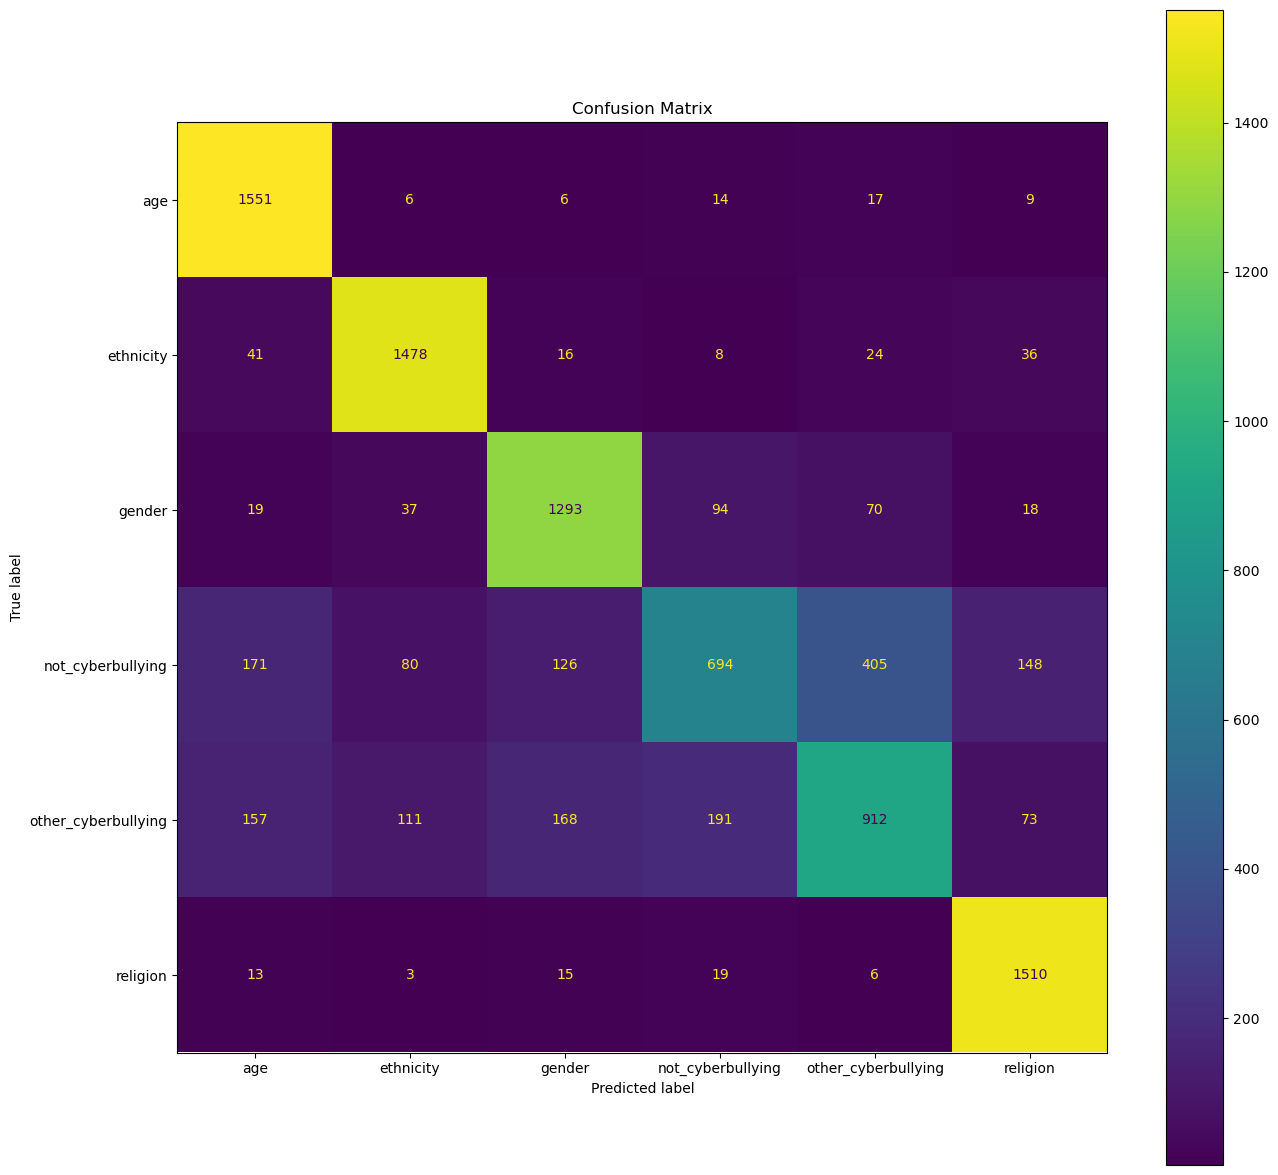

In [19]:
conf_matrix=confusion_matrix(Y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(f"Train Accuracy:{accuracy_score(nb.predict(X_train),Y_train)*100}")
print(f"Test Accuracy:{accuracy_score(nb.predict(X_test),Y_test)*100}")
print(f"Precision:{precision_score(nb.predict(X_test),Y_test,average='macro')*100}")
print(f"Recall:{recall_score(nb.predict(X_test),Y_test,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test,nb.predict(X_test),average='weighted')*100}")

Train Accuracy:83.30406521112363
Test Accuracy:77.97463046440927
Precision:78.19108182485947
Recall:76.84382460206183
F1 Score: 76.6023785202735


#### K-Nearest Neighbors(KNN) Algorithm

In [21]:
knnc=KNeighborsClassifier()
knnc.fit(X_train_t,Y_train_t)

KNeighborsClassifier()

In [22]:
print(f"The score of train datasets is {accuracy_score(knnc.predict(X_train_t),Y_train_t)*100}")
print(f"The score of test datasets is {accuracy_score(knnc.predict(X_test_t),Y_test_t)*100}")

The score of train datasets is 85.34584436348386
The score of test datasets is 78.18429604780376


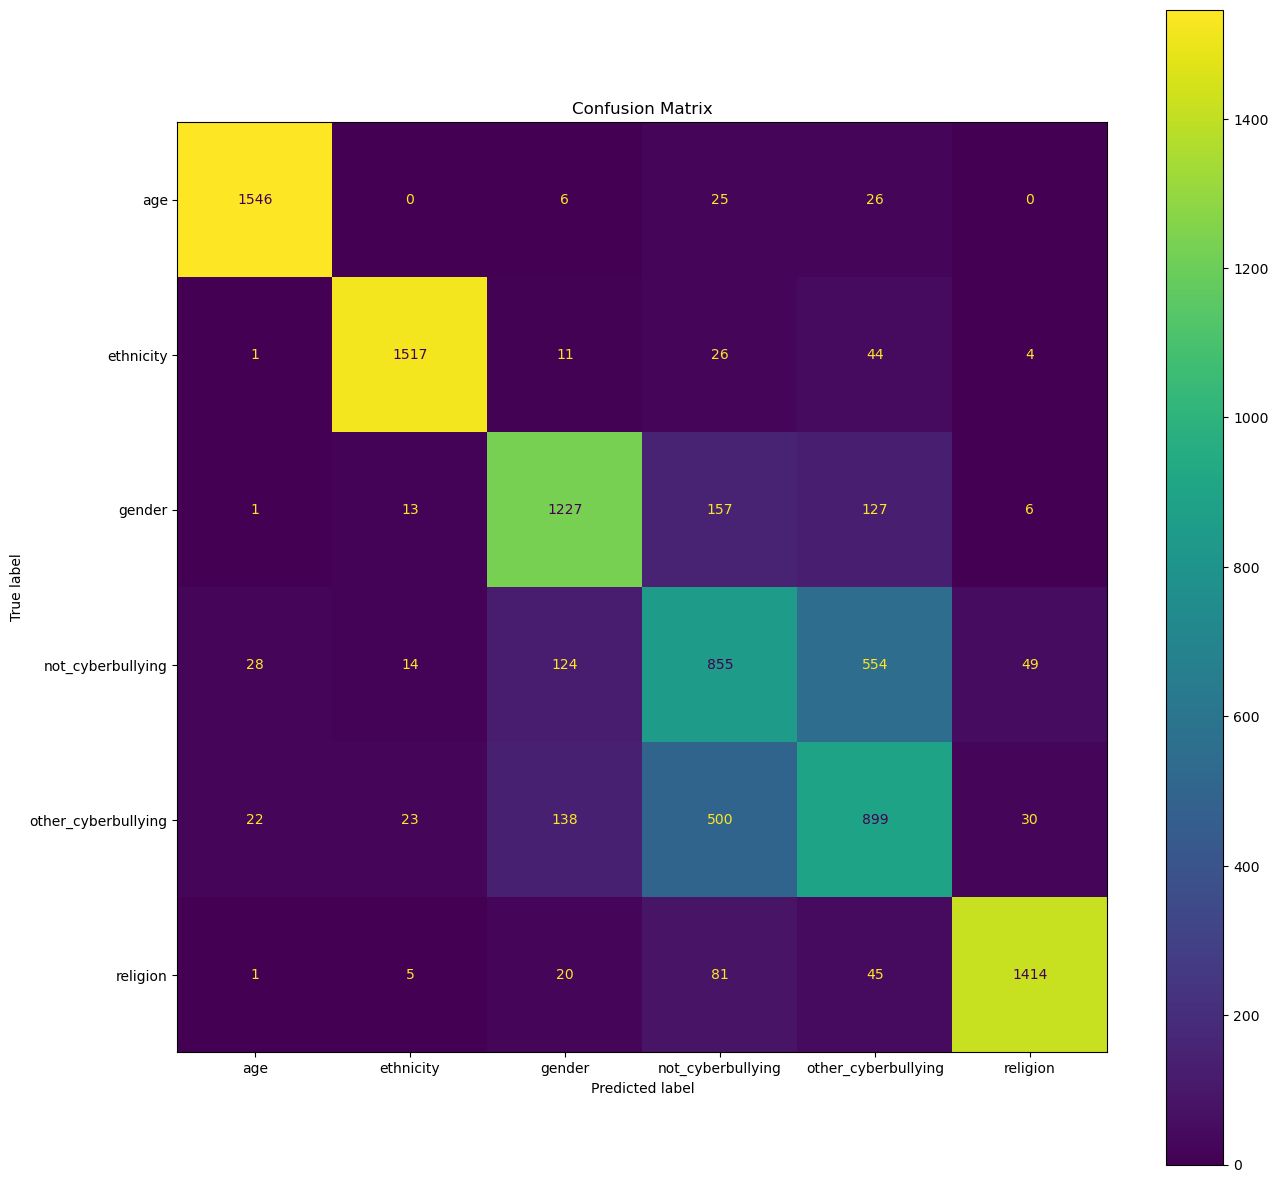

In [23]:
conf_matrix=confusion_matrix(Y_test_t, knnc.predict(X_test_t))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(f"Train Accuracy:{accuracy_score(knnc.predict(X_train_t),Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(knnc.predict(X_test_t),Y_test_t)*100}")
print(f"Precision:{precision_score(knnc.predict(X_test_t),Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(knnc.predict(X_test_t),Y_test_t,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test_t,knnc.predict(X_test_t),average='weighted')*100}")

Train Accuracy:85.34584436348386
Test Accuracy:78.18429604780376
Precision:78.32227990314314
Recall:78.78619143569449
F1 Score: 78.39375511394002


#### Decision Tree Classifier

In [25]:
dtc=tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train_t,Y_train_t)
t_pred=dtc.predict(X_train_t)
pred=dtc.predict(X_test_t)

In [26]:
print(f"The score of train datasets is {accuracy_score(t_pred,Y_train_t)*100}")
print(f"The score of test datasets is {accuracy_score(pred,Y_test_t)*100}")

The score of train datasets is 96.79710638744005
The score of test datasets is 72.31365971275815


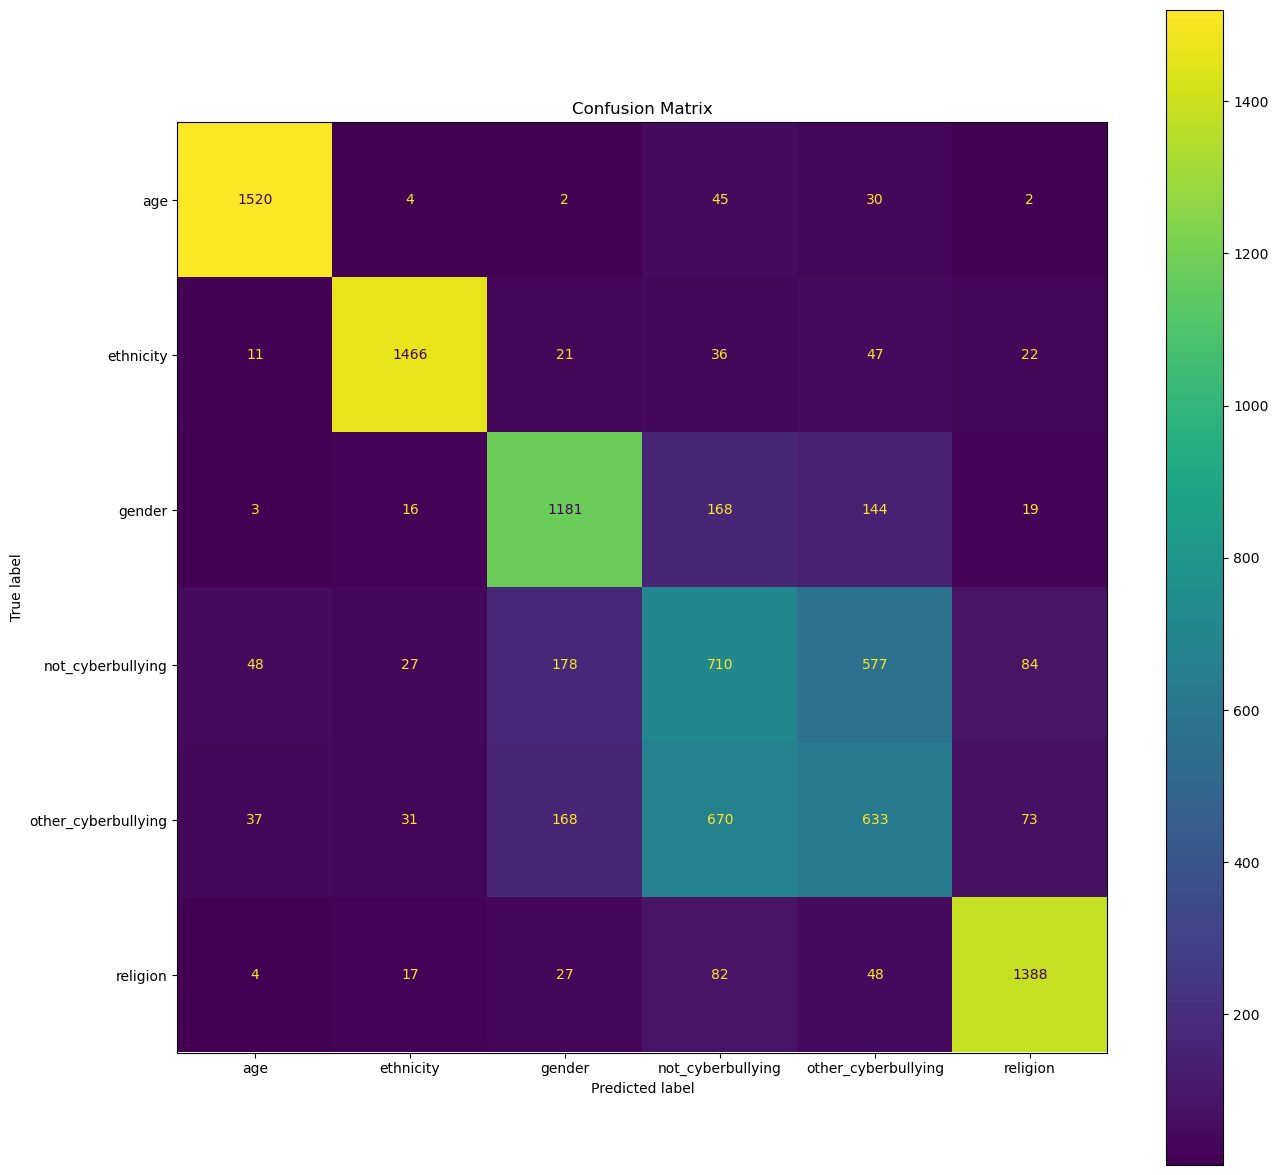

In [27]:
conf_matrix=confusion_matrix(Y_test_t, pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [28]:
print(f"Train Accuracy:{accuracy_score(t_pred,Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(pred,Y_test_t)*100}")
print(f"Precision:{precision_score(pred,Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(pred,Y_test_t,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test_t,pred,average='weighted')*100}")

Train Accuracy:96.79710638744005
Test Accuracy:72.31365971275815
Precision:72.50592011667364
Recall:72.35964105237215
F1 Score: 72.22550306936704


#### Logistic Regression

In [29]:
lrc=LogisticRegression(multi_class='multinomial',solver='newton-cg')
lrc.fit(X_train_t,Y_train_t)
t_pred=lrc.predict(X_train_t)
pred=lrc.predict(X_test_t)

In [30]:
print(f"Train Accuracy:{accuracy_score(t_pred,Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(pred,Y_test_t)*100}")
print(f"Precision:{precision_score(pred,Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(pred,Y_test_t,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test_t,pred,average='weighted')*100}")

Train Accuracy:78.39750478337221
Test Accuracy:77.93269734773037
Precision:78.05506722422386
Recall:79.96302346264417
F1 Score: 77.51270018977611


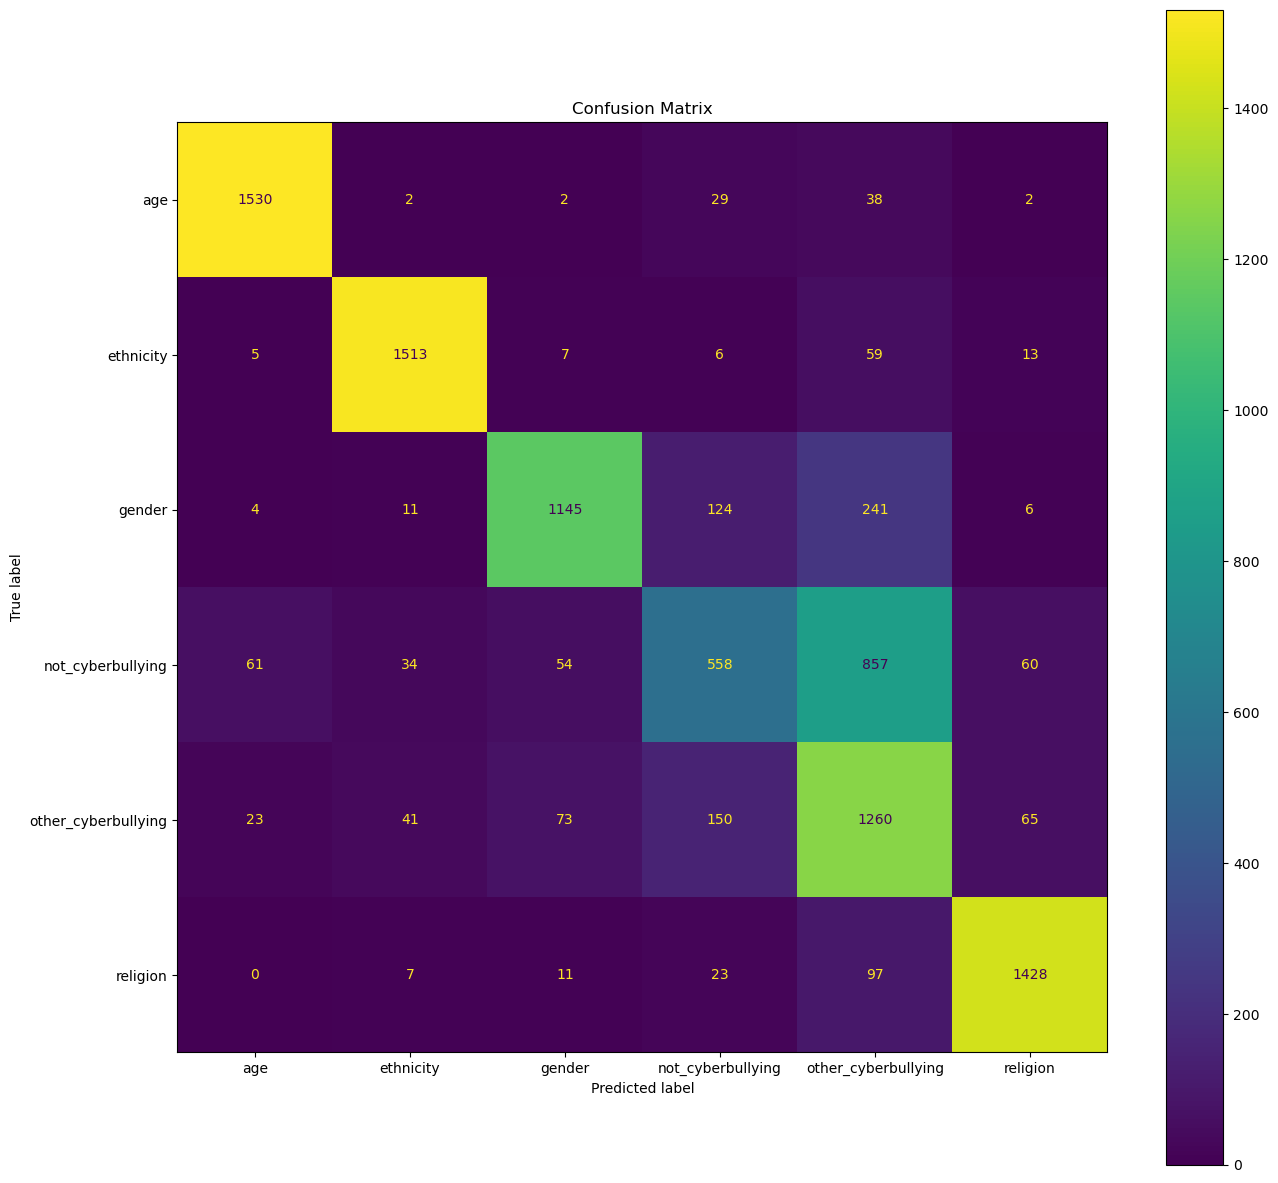

In [31]:
conf_matrix=confusion_matrix(Y_test_t, pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

#### Random Forest

In [32]:
rfc=RandomForestClassifier(n_estimators=125,random_state=42)
rfc.fit(X_train_t,Y_train_t)
t_pred=rfc.predict(X_train_t)
pred=rfc.predict(X_test_t)

In [33]:
print(f"Train Accuracy:{accuracy_score(t_pred,Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(pred,Y_test_t)*100}")
print(f"Precision:{precision_score(pred,Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(pred,Y_test_t,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test_t,pred,average='weighted')*100}")

Train Accuracy:96.79710638744005
Test Accuracy:77.66013208931753
Precision:77.81774920458486
Recall:78.24019150113944
F1 Score: 77.77171052512702


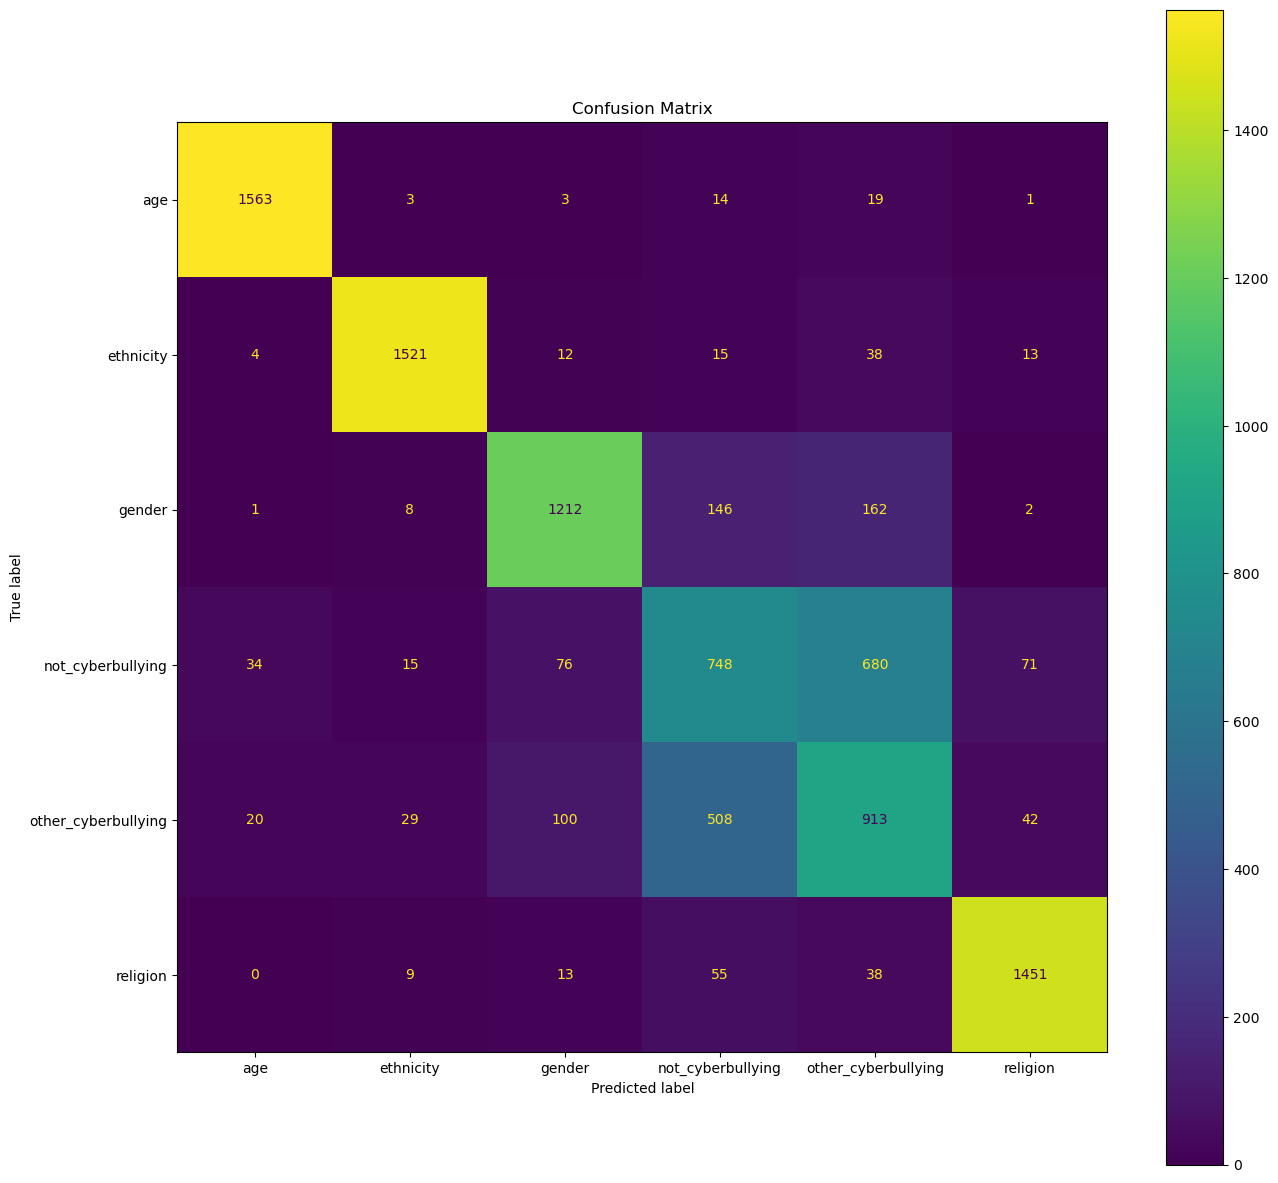

In [34]:
conf_matrix=confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

#### Gradient Boosting

In [35]:
gbc=GradientBoostingClassifier(n_estimators=150,random_state=42)
gbc.fit(X_train_t,Y_train_t)
t_pred=gbc.predict(X_train_t)
pred=gbc.predict(X_test_t)

In [36]:
print(f"Train Accuracy:{accuracy_score(t_pred,Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(pred,Y_test_t)*100}")
print(f"Precision:{precision_score(pred,Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(pred,Y_test_t,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test_t,pred,average='weighted')*100}")

Train Accuracy:83.11273032264829
Test Accuracy:79.33745675647343
Precision:79.4478889342754
Recall:80.37127613845607
F1 Score: 79.4879351995105


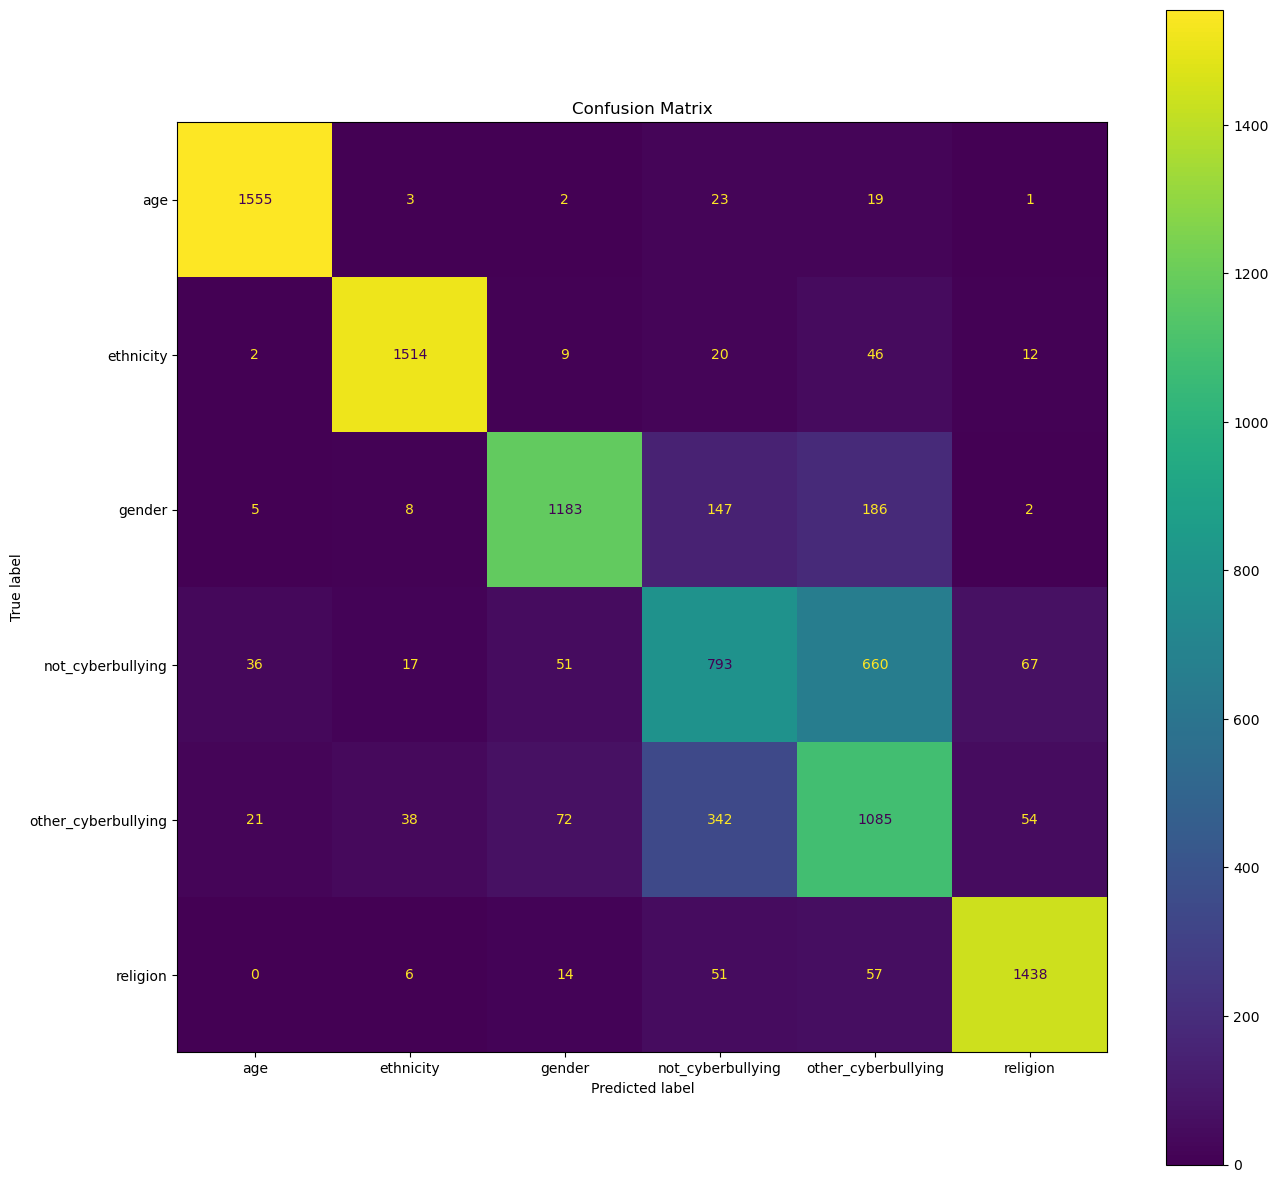

In [37]:
conf_matrix=confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

#### AdaBoost

In [39]:
adc=AdaBoostClassifier(base_estimator=dtc,n_estimators=100)
adc.fit(X_train_t,Y_train_t)
t_pred=adc.predict(X_train_t)
pred=adc.predict(X_test_t)

In [40]:
print(f"Train Accuracy:{accuracy_score(t_pred,Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(pred,Y_test_t)*100}")
print(f"Precision:{precision_score(pred,Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(pred,Y_test_t,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test_t,pred,average='weighted')*100}")

Train Accuracy:96.67653919744188
Test Accuracy:77.07306845581297
Precision:77.23617289832978
Recall:77.81726094053852
F1 Score: 77.26210822212438


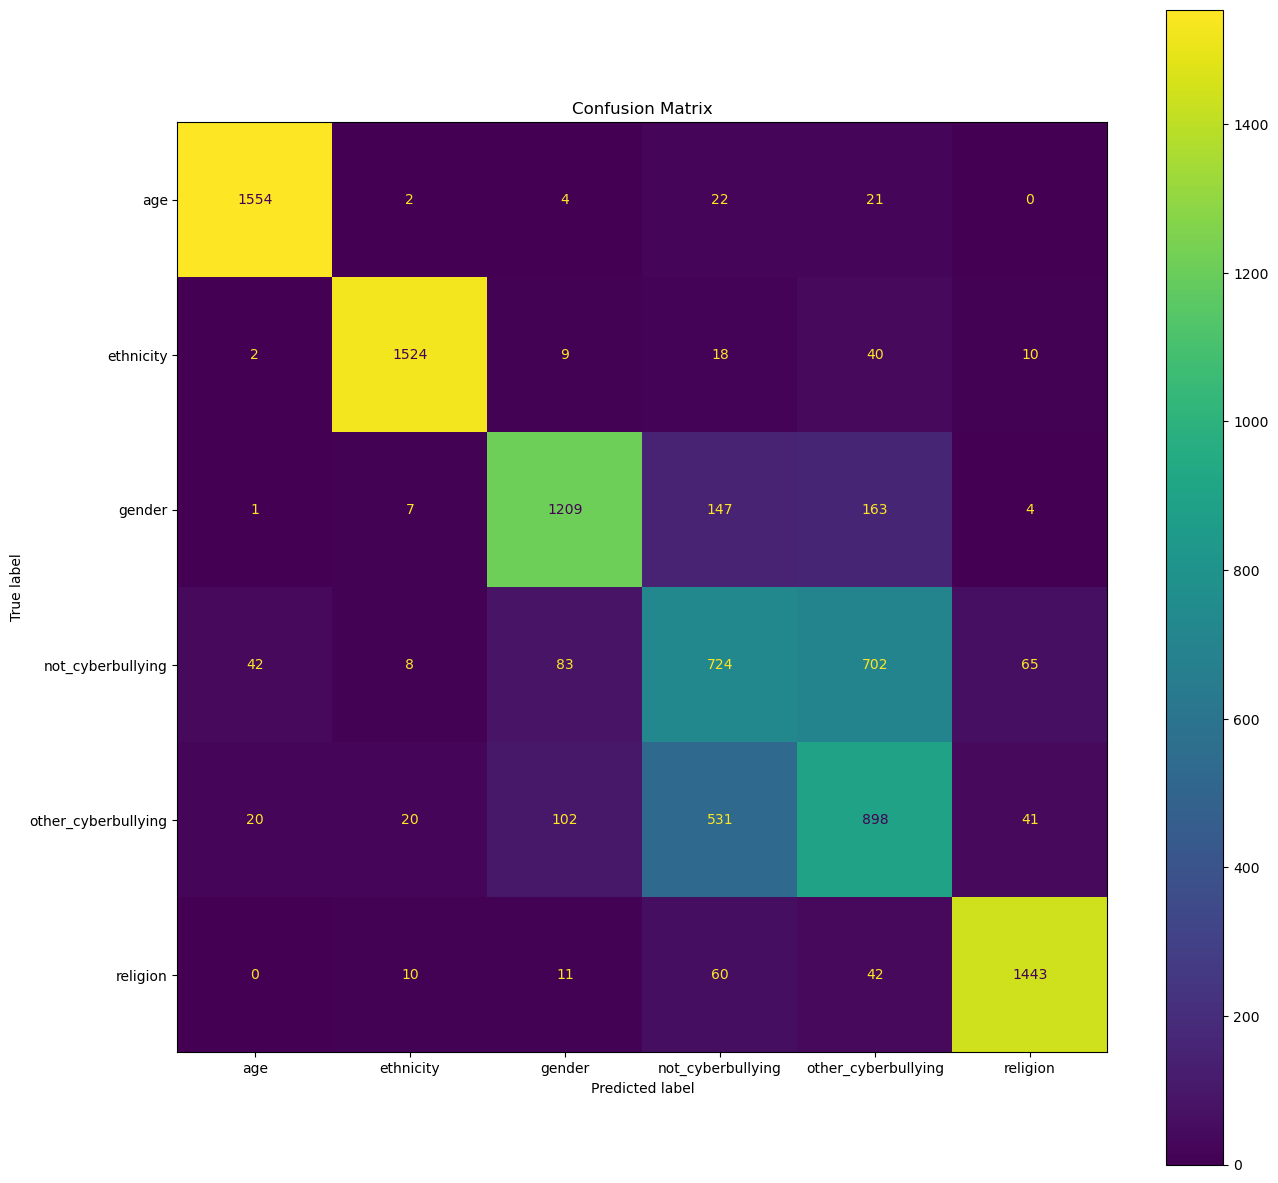

In [41]:
conf_matrix=confusion_matrix(Y_test_t, pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

#### XGBoost

In [42]:
params={
    'max_depth':3,
    'eta':0.1,
    'objective':'multi:softmax',
    'num_class':6
}
dtrain=xgb.DMatrix(X_train_t,label=Y_train_t)

xgbc=xgb.train(params,dtrain,num_boost_round=10)

In [43]:
dtest=xgb.DMatrix(X_test_t)
pred=xgbc.predict(dtest)
t_pred=xgbc.predict(dtrain)

In [44]:
print(f"Train Accuracy:{accuracy_score(t_pred,Y_train_t)*100}")
print(f"Test Accuracy:{accuracy_score(pred,Y_test_t)*100}")
print(f"Precision:{precision_score(pred,Y_test_t,average='macro')*100}")
print(f"Recall:{recall_score(pred,Y_test,average='macro')*100}")
print(f"F1 Score: {f1_score(Y_test,pred,average='weighted')*100}")

Train Accuracy:75.93898251775745
Test Accuracy:75.44816018450571
Precision:75.55029776003116
Recall:76.60215722438149
F1 Score: 75.48125312803231


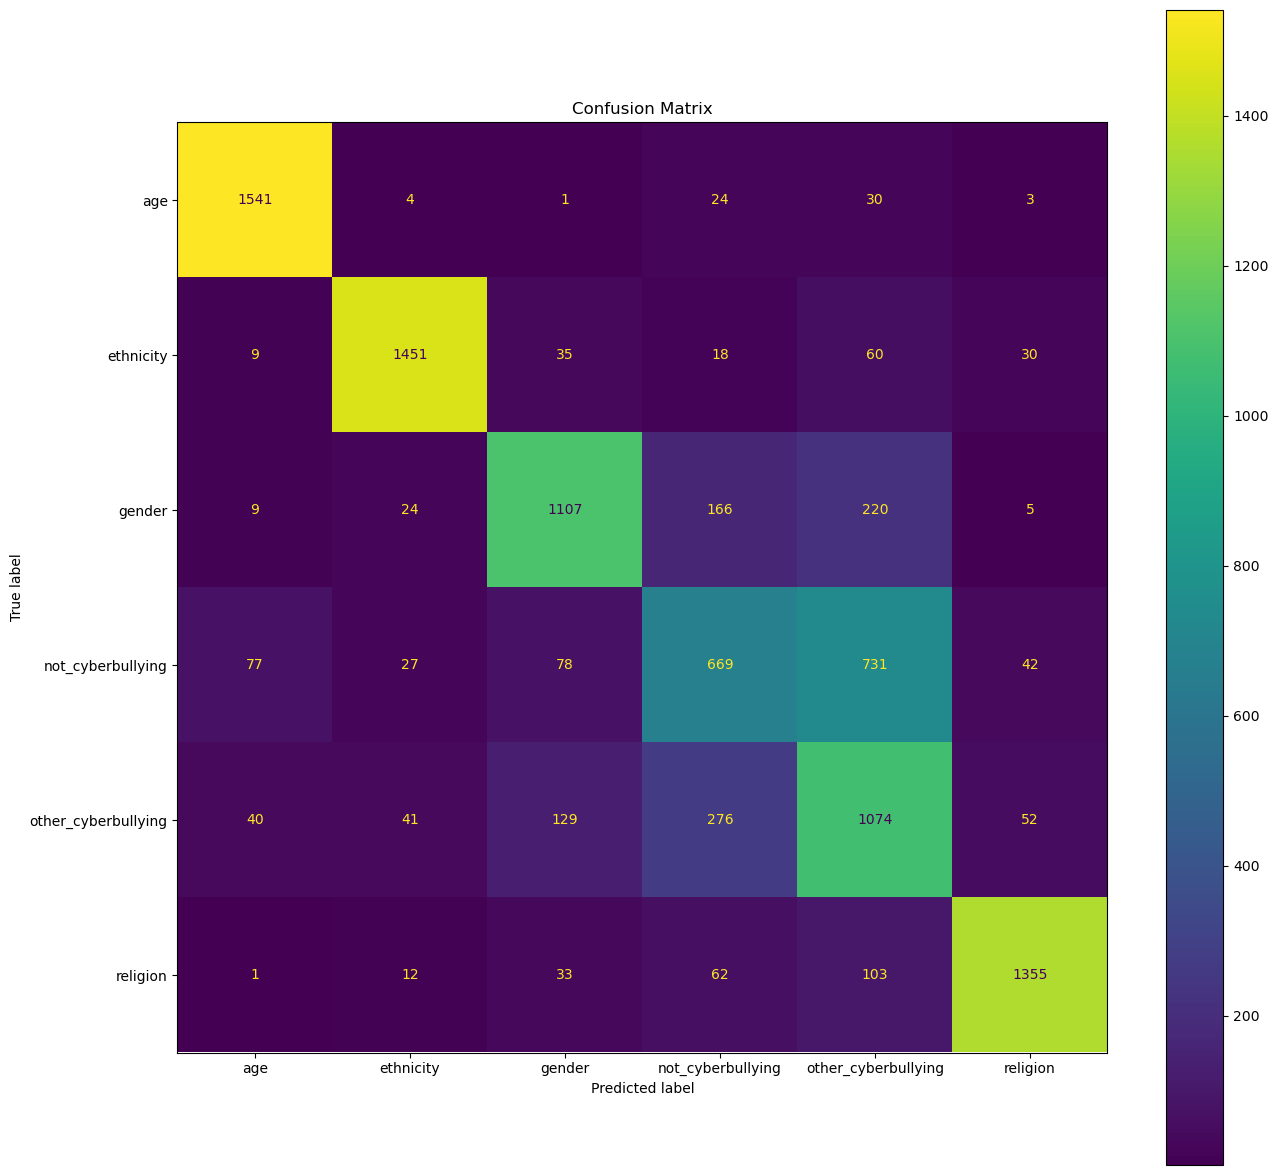

In [45]:
conf_matrix=confusion_matrix(Y_test,pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lenc.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

### Conclusion

In [48]:
dump(gbc,"Gradient.joblib")

['Gradient.joblib']

In [51]:
dump(vec,"Tfidf.joblib")

['Tfidf.joblib']

In [53]:
dump(pca,"pca.joblib")

['pca.joblib']

In [54]:
dump(lenc,"len.joblib")

['len.joblib']